In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [20]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [21]:
DATA = Path("../../data")

In [22]:
train_data = pd.read_csv(DATA / "train.csv")

In [23]:
train_data.head(50)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,5.91,8.20,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,19.07,12.69,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,8.31,9.77,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,5.77,17.13,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,7.13,12.77,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [25]:
train_data.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [26]:
for column in train_data.columns[1:]:
    print(f"== {column} ==")
    print(f"{train_data[column].unique()}")

== class ==
['e' 'p']
== cap-diameter ==
[ 8.8   4.51  6.94 ... 38.11 55.63 54.07]
== cap-shape ==
['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
== cap-surface ==
['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-

In [34]:
null_persent = train_data.isna().mean().sort_values()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'id'),
  Text(1, 0, 'stem-width'),
  Text(2, 0, 'stem-height'),
  Text(3, 0, 'season'),
  Text(4, 0, 'class'),
  Text(5, 0, 'cap-diameter'),
  Text(6, 0, 'does-bruise-or-bleed'),
  Text(7, 0, 'cap-color'),
  Text(8, 0, 'has-ring'),
  Text(9, 0, 'stem-color'),
  Text(10, 0, 'cap-shape'),
  Text(11, 0, 'habitat'),
  Text(12, 0, 'gill-color'),
  Text(13, 0, 'ring-type'),
  Text(14, 0, 'gill-attachment'),
  Text(15, 0, 'cap-surface'),
  Text(16, 0, 'gill-spacing'),
  Text(17, 0, 'stem-surface'),
  Text(18, 0, 'veil-color'),
  Text(19, 0, 'stem-root'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'veil-type')])

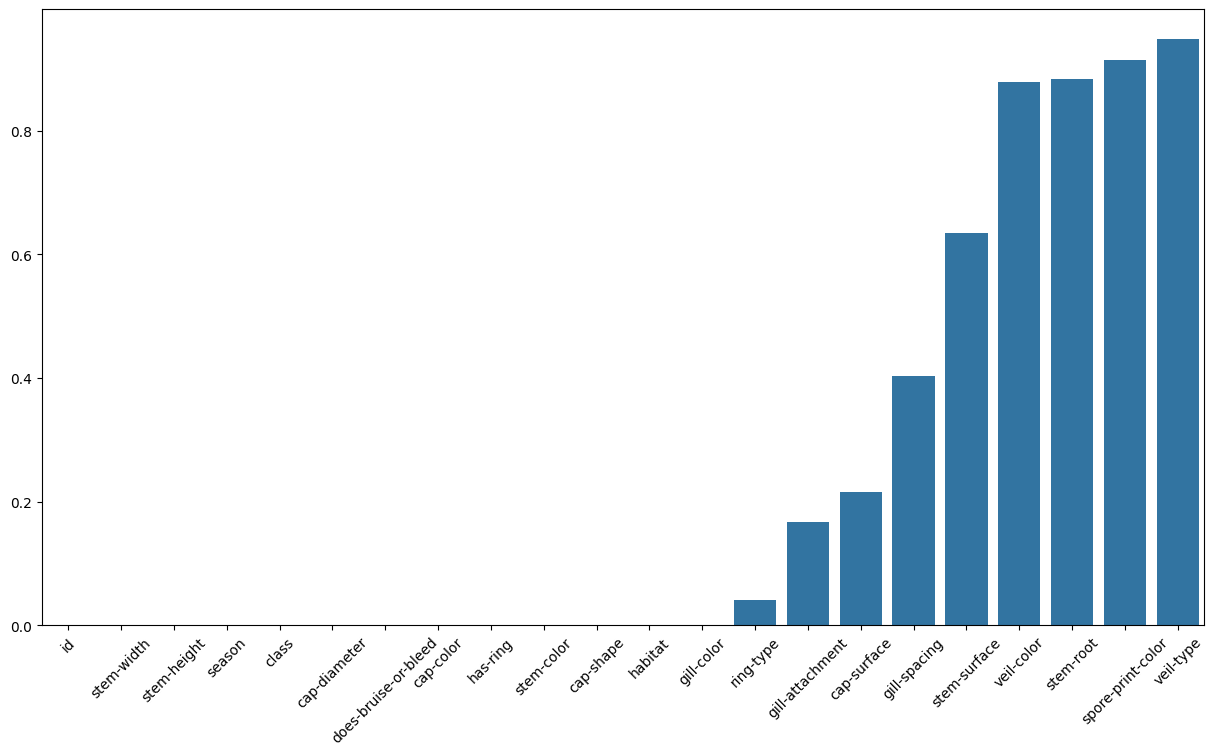

In [35]:
plt.figure(figsize=(15, 8))
sns.barplot(null_persent)
plt.xticks(rotation=45)

일단 많은 missing value를 가지고 있는 Feature가 존재함, 또한 missing value 뿐만 아니라 outlier도 존재함 따라서
1. outlier 보정 진행
2. missing value가 존재하는 columns 제거 또는 보정
3. AutoML로 모델링 후 성능 확인 및 비교
4. 원본 데이터를 합친 후 성능 확인 및 비교